 # **Análise e Exploração de Dados com SQL**

*Esse notebook faz parte do módulo de SQL do curso de análise de dados da EBAC.*

# * **Introdução:**

O foco desse projeto é analisar os padrões de consumo dos clientes de um cartão de crédito, para entender se existe uma desigualdade nos limites de crédito concedidos para diferentes faixas salariais e gêneros.

# * **Explorando os Dados**


* **Os dados:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

idade = idade do cliente

sexo = sexo do cliente (F ou M)

dependentes = número de dependentes do cliente

escolaridade = nível de escolaridade do clientes

salario_anual = faixa salarial do cliente

tipo_cartao = tipo de cartao do cliente

qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

meses_inativo_12m = quantidade de meses que o cliente ficou inativo

limite_credito = limite de credito do cliente

valor_transacoes_12m = valor das transações dos ultimos 12 meses

qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


*A tabela foi criada no SQL Server*

* **Quantos registros vamos analisar?**

    Query: SELECT COUNT(*) AS total_registros FROM credito;

*Reposta: 2564 linhas*

* **Como estão organizados os dados?**

    Query: SELECT TOP 10 * FROM credito;

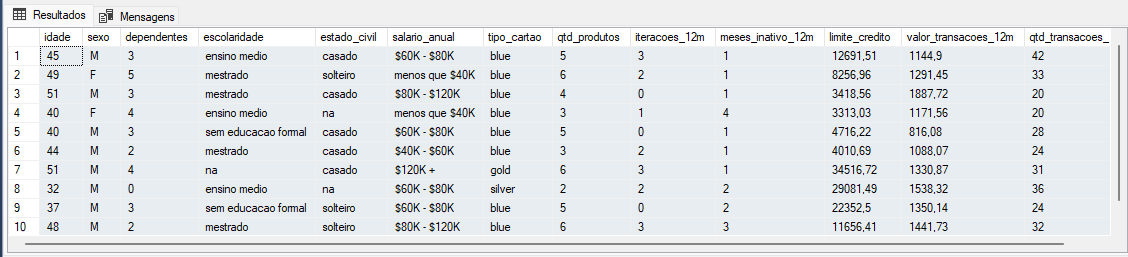

Podemos ver uma tabela estruturada, com alguns dados nulos. Mais a frente vamos entender esses dados.

* **Tipos de dados**

    Query: 
    SELECT COLUMN_NAME, DATA_TYPE
    FROM INFORMATION_SCHEMA.COLUMNS
    WHERE TABLE_NAME = 'credito';
       
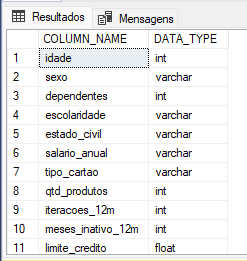

* **Generos:**

    Query: 
    SELECT sexo, COUNT(*) AS total_clientes
    FROM credito
    GROUP BY sexo;

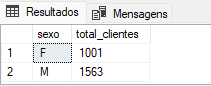

* **Estado civil**

    Query: 
    SELECT estado_civil, 
    COUNT(*) AS total_clientes
    FROM credito
    GROUP BY estado_civil
    ORDER BY total_clientes DESC;
    
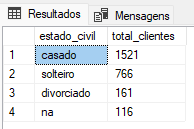

* **Escolaridade**

    Query: 
    SELECT escolaridade, 
    COUNT(*) AS total_clientes
    FROM credito
    GROUP BY escolaridade
    ORDER BY total_clientes DESC;
    
    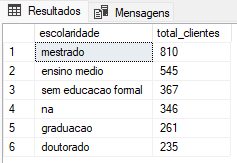

* **Faixa Salarial** 

    Query:
    SELECT salario_anual, 
    COUNT(*) AS total_clientes
    FROM credito
    GROUP BY salario_anual
    ORDER BY 
    CASE 
        WHEN salario_anual = 'menos que $40K' THEN 1
        WHEN salario_anual = '$40K - $60K' THEN 2
        WHEN salario_anual = '$60K - $80K' THEN 3
        WHEN salario_anual = '$80K - $120K' THEN 4
        WHEN salario_anual = 'acima de $120K' THEN 5
    ELSE 6
    END ASC;
    
    
    
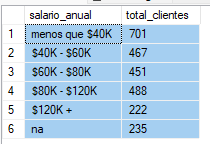


*Podemos notar nesse resultado que a faixa salárial que mais tem clientes é até 40K por ano.*

* **Qual o numero exato de homens e mulheres em cada faixa salarial?**

    Query: 
    SELECT salario_anual, 
    sexo, 
    COUNT(*) AS total_clientes
    FROM credito
    GROUP BY salario_anual, sexo
    ORDER BY salario_anual ASC, sexo;
  
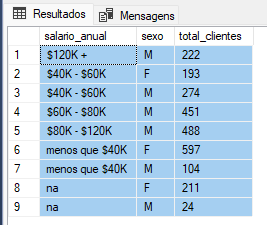


* **Temos aqui um gráfico que ilustra bem isso:**

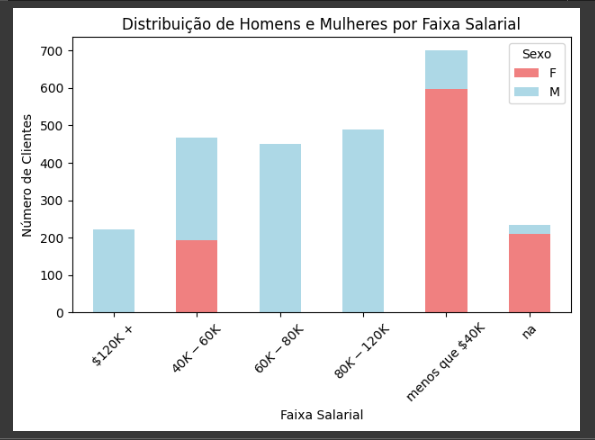

*O gráfico já indica uma diferença significativa entre homens e mulheres em relação aos altos salários. As mulheres estão concentradas apenas nas faixas salariais mais baixas.*

* **Quais são os limites dos cartões de crédito?**
    
    Query: 
    SELECT 
    MIN(limite_credito) AS menor_limite,
    MAX(limite_credito) AS maior_limite,
    ROUND(AVG(limite_credito), 2) AS media_limite
    FROM credito;
    
    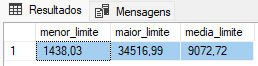

* **Como são divididos esses limites entre os gêneros?**

    Query:
    SELECT sexo, 
    MIN(limite_credito) AS menor_limite_credito,
    MAX(limite_credito) AS maior_limite_credito,
    ROUND(AVG(limite_credito), 2) AS media_limite_credito
    FROM credito
    GROUP BY sexo;
        
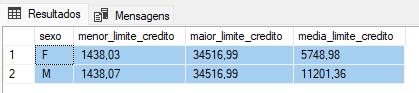****

*Com essa análise, já podemos observar que, embora ambos os gêneros apareçam entre os maiores limites de crédito, na média geral, o limite dos cartões dos homens é mais que o dobro do limite dos cartões das mulheres.*


* **Grafico para ilustrar os limites entre gêneros:**

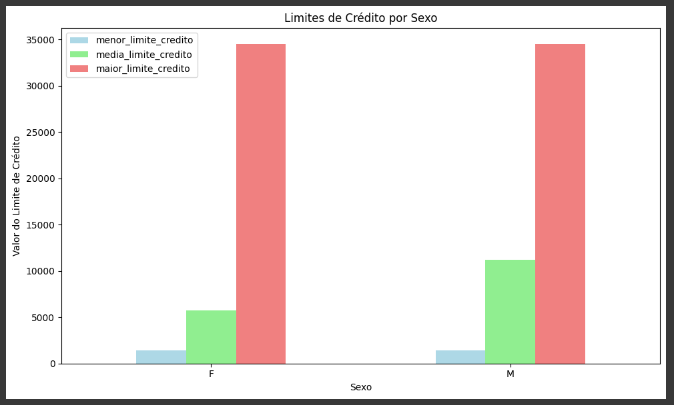

*Mais uma vez, o gráfico mostra que tanto homens quanto mulheres podem ter limites altos e baixos. No entanto, ao observarmos a média, fica evidente a diferença significativa entre os gêneros.*

* **E como está distribuido os limites dentro das faixas salariais?**

    Query:
    SELECT salario_anual, 
    ROUND(AVG(limite_credito), 2) AS media_limite_credito
    FROM credito
    GROUP BY salario_anual
    ORDER BY 
    CASE 
        WHEN salario_anual = 'menos que $40K' THEN 1
        WHEN salario_anual = '$40K - $60K' THEN 2
        WHEN salario_anual = '$60K - $80K' THEN 3
        WHEN salario_anual = '$80K - $120K' THEN 4
        WHEN salario_anual = 'acima de $120K' THEN 5
        ELSE 6
        END ASC;
        
        
        
 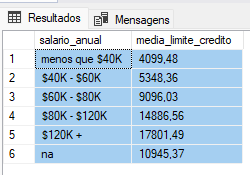

* **Vamos analisar a média de limite do cartão por faixa salarial e gênero:**

    Query: 
    SELECT salario_anual, 
    sexo,
    ROUND(AVG(limite_credito), 2) AS media_limite_credito
    FROM credito
    GROUP BY salario_anual, sexo
    ORDER BY salario_anual ASC, sexo;
    
    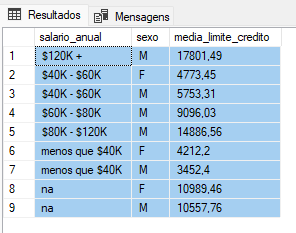
    
*Em uma breve análise, já pudemos observar que não há mulheres nas faixas salariais mais altas.*

* **Usarei um gráfico para ilustar melhor essa distribuição de limite entre os generos e faixas salariais.**

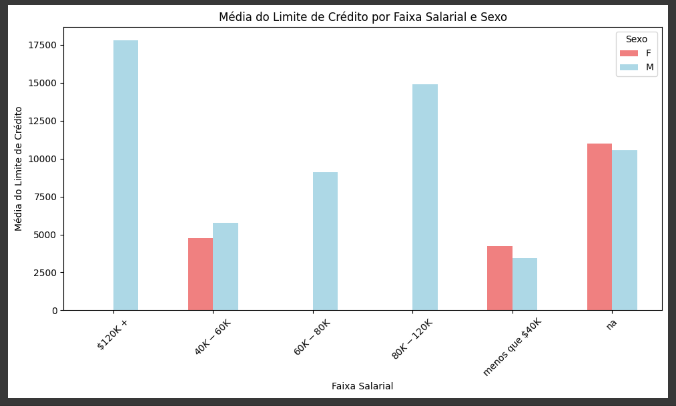

*Analisando o gráfico, poderíamos pensar que o crédito entre homens e mulheres está bem equilibrado. No entanto, mais uma vez, temos a evidência da ausência de mulheres nas faixas salariais mais altas. Nas três faixas salariais em que elas estão presentes, justamente na mais alta, as mulheres possuem um crédito menor.*

* **Como é o perfil de gastos por genero? Vamos analisar mais de perto:**

* Valor Total de Quantidade de Transações e Valor de Transações:

    Query 1: 
    SELECT sexo, 
    SUM(qtd_produtos) AS total_produtos_comprados, 
    SUM(valor_transacoes_12m) AS total_valor_transacoes
    FROM credito
    GROUP BY sexo;

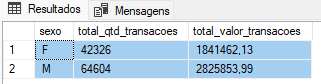

* Média de quantidade de transações e valor de transações:

    Query 2: 
    SELECT sexo, 
    ROUND(AVG(qtd_transacoes_12m), 2) AS media_qtd_transacoes,
    ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes
    FROM credito
    GROUP BY sexo;
  
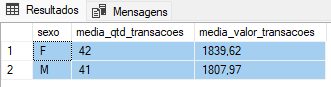

*Na média, homens e mulheres estão consumindo de forma bastante semelhante, tanto em relação à quantidade de transações quanto aos valores das transações.*

* **Quando adicionamos as faixas salarias será que conseguimos alguma nova informação?**

    Query:
    SELECT salario_anual, 
    sexo, 
    ROUND(AVG(qtd_transacoes_12m), 2) AS media_qtd_transacoes,
    ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes
    FROM credito
    GROUP BY salario_anual, sexo
    ORDER BY salario_anual ASC, sexo;
    
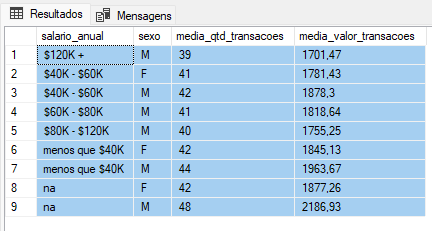

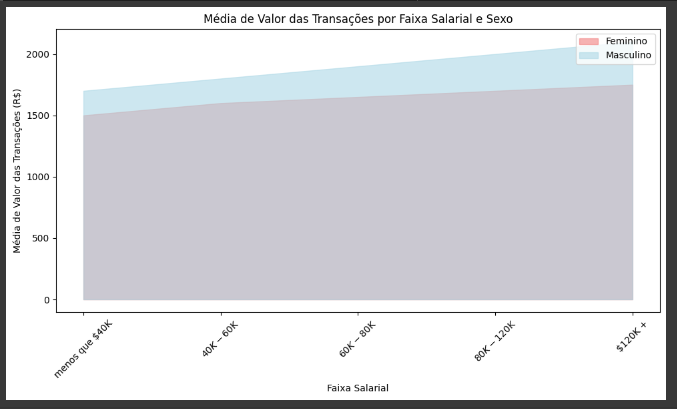

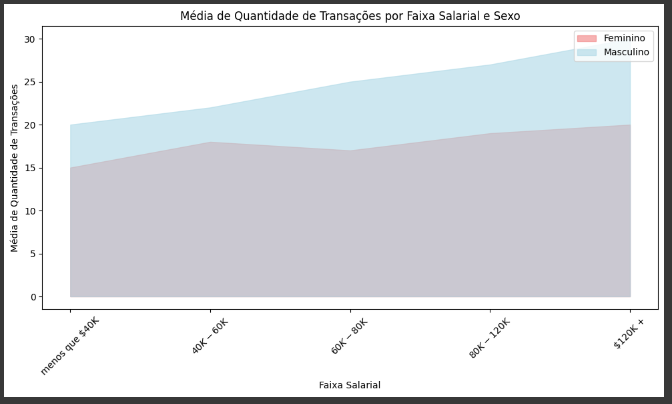

*Os gráficos demonstram que, mesmo com comportamentos de gastos e salários semelhantes, os homens tendem a ter um crédito maior do que as mulheres.*

# # **Conclusão**

*Essas foram as principais análises realizadas com base nos dados de crédito. Abaixo estão alguns insights relevantes que surgiram durante a exploração dos dados:*

* *A maioria dos clientes são homens*.
* *A maior parte dos clientes se encontra na faixa salarial de até 40K por ano.*
* *Não há mulheres ganhando mais de 60K por ano.*
* *Em média, o limite de crédito dos homens é mais do que o dobro do limite concedido às mulheres.*
* *Homens e mulheres apresentam médias de gastos anuais bastante semelhantes.*

*Com base nesses dados, é evidente que, mesmo nas faixas salariais mais altas, as mulheres possuem um limite de crédito inferior ao dos homens. Para corrigir essa discrepância e aumentar a satisfação e o uso do cartão entre as clientes do sexo feminino, sugere-se uma revisão nas políticas de concessão de crédito.*

